# Minimal DDIM (CIFAR-10) with Adam

In [1]:
# Imports
from pathlib import Path
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets, utils
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

# Import implementation
from implementations.base_implementation import (
    DiffusionSchedule, UNet, sample_loop, train_ddim)

# import numpy as np
# import random
# seed = 0
# random.seed(seed)
# np.random.seed(seed)
# torch.manual_seed(seed)
# torch.cuda.manual_seed_all(seed)

# # Deterministic operations (Optional but recommended for exact reproducibility)
# # Note: This might make training slower. If speed is priority, keep benchmark=True
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False

print('torch:', torch.__version__)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device ->', device)

torch: 2.9.0+cu126
device -> cuda
torch: 2.9.0+cu126
device -> cuda


In [2]:
# CIFAR-10 data loaders
def get_dataloaders(batch_size=128, img_size=32, num_workers=4):
    transform = transforms.Compose([
        transforms.Resize(img_size),
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),  # map to [-1,1]
    ])
    train_ds = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    test_ds = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
    test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)
    return train_loader, test_loader

train_loader, test_loader = get_dataloaders(batch_size=128, img_size=32, num_workers=2)

In [3]:
# Helper to show saved sample grid
from PIL import Image
def show_image(path, figsize=(6,6)):
    img = Image.open(path)
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


In [4]:
# WARNING: Training DDIM on CIFAR-10 is moderately heavy. Reduce epochs or timesteps for quick tests.
timesteps = 1000  # use 1000 for standard DDIM training; reduce for inference
model = UNet(in_ch=3, base_ch=64, time_emb_dim=64)
schedule = DiffusionSchedule(timesteps=timesteps, device=device)
print(f'Model parameters: {sum(p.numel() for p in model.parameters())/1e6:.2f}M')

# To run training WITH lambda max computation, uncomment the following line:
train_ddim(
    model, schedule, train_loader, device,
    epochs=100,
    lr=2e-4,
    save_dir='./runs_ddim', 
    ema_decay=0.995,
)

print('Notebook set up. To begin training, call train_ddim(...) as shown above.')

Model parameters: 8.22M
Compiling model...


Epoch 1/100: 100%|██████████| 391/391 [02:12<00:00,  2.96it/s, loss=0.1207, lr=0.00020]


End epoch 1, avg loss 0.1471


DDIM Sampling:   0%|          | 0/100 [00:00<?, ?it/s]/home/arthurdls/anaconda3/envs/eos-diffusion/lib/python3.12/site-packages/torch/backends/cuda/__init__.py:131: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Pytorch 2.9. Please see https://pytorch.org/docs/main/notes/cuda.html#tensorfloat-32-tf32-on-ampere-and-later-devices (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:80.)
  return torch._C._get_cublas_allow_tf32()
/home/arthurdls/anaconda3/envs/eos-diffusion/lib/python3.12/site-packages/torch/_inductor/compile_fx.py:312: UserWarning: TensorFloat32 tensor cores for float32 matrix multiplication available but not enabled. Consider setting `torch.set_float32_matmul_pre

Saved samples to runs_ddim/samples_epoch_1.png


Epoch 2/100: 100%|██████████| 391/391 [00:28<00:00, 13.89it/s, loss=0.0808, lr=0.00020]


End epoch 2, avg loss 0.0814


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 158.24it/s]


Saved samples to runs_ddim/samples_epoch_2.png


Epoch 3/100: 100%|██████████| 391/391 [00:28<00:00, 13.82it/s, loss=0.0710, lr=0.00020]


End epoch 3, avg loss 0.0734


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 155.40it/s]


Saved samples to runs_ddim/samples_epoch_3.png


Epoch 4/100: 100%|██████████| 391/391 [00:28<00:00, 13.49it/s, loss=0.0603, lr=0.00020]


End epoch 4, avg loss 0.0695


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 153.31it/s]


Saved samples to runs_ddim/samples_epoch_4.png


Epoch 5/100: 100%|██████████| 391/391 [00:29<00:00, 13.27it/s, loss=0.0765, lr=0.00020]


End epoch 5, avg loss 0.0669


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 151.66it/s]


Saved samples to runs_ddim/samples_epoch_5.png


Epoch 6/100: 100%|██████████| 391/391 [00:29<00:00, 13.13it/s, loss=0.0582, lr=0.00020]


End epoch 6, avg loss 0.0654


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 150.64it/s]


Saved samples to runs_ddim/samples_epoch_6.png


Epoch 7/100: 100%|██████████| 391/391 [00:29<00:00, 13.05it/s, loss=0.0598, lr=0.00020]


End epoch 7, avg loss 0.0638


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 151.15it/s]


Saved samples to runs_ddim/samples_epoch_7.png


Epoch 8/100: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s, loss=0.0587, lr=0.00020]


End epoch 8, avg loss 0.0635


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 155.60it/s]


Saved samples to runs_ddim/samples_epoch_8.png


Epoch 9/100: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s, loss=0.0552, lr=0.00020]


End epoch 9, avg loss 0.0630


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 151.60it/s]


Saved samples to runs_ddim/samples_epoch_9.png


Epoch 10/100: 100%|██████████| 391/391 [00:30<00:00, 12.87it/s, loss=0.0574, lr=0.00020]


End epoch 10, avg loss 0.0625


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 151.76it/s]


Saved samples to runs_ddim/samples_epoch_10.png


Epoch 11/100: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s, loss=0.0458, lr=0.00019]


End epoch 11, avg loss 0.0621


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 151.16it/s]


Saved samples to runs_ddim/samples_epoch_11.png


Epoch 12/100: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s, loss=0.0573, lr=0.00019]


End epoch 12, avg loss 0.0613


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 149.29it/s]


Saved samples to runs_ddim/samples_epoch_12.png


Epoch 13/100: 100%|██████████| 391/391 [00:30<00:00, 12.84it/s, loss=0.0583, lr=0.00019]


End epoch 13, avg loss 0.0607


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 147.83it/s]


Saved samples to runs_ddim/samples_epoch_13.png


Epoch 14/100: 100%|██████████| 391/391 [00:31<00:00, 12.42it/s, loss=0.0564, lr=0.00019]


End epoch 14, avg loss 0.0603


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 146.34it/s]


Saved samples to runs_ddim/samples_epoch_14.png


Epoch 15/100: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s, loss=0.0653, lr=0.00019]


End epoch 15, avg loss 0.0604


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 147.80it/s]


Saved samples to runs_ddim/samples_epoch_15.png


Epoch 16/100: 100%|██████████| 391/391 [00:31<00:00, 12.60it/s, loss=0.0692, lr=0.00019]


End epoch 16, avg loss 0.0594


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 147.44it/s]


Saved samples to runs_ddim/samples_epoch_16.png


Epoch 17/100: 100%|██████████| 391/391 [00:30<00:00, 12.63it/s, loss=0.0559, lr=0.00019]


End epoch 17, avg loss 0.0595


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 146.22it/s]


Saved samples to runs_ddim/samples_epoch_17.png


Epoch 18/100: 100%|██████████| 391/391 [00:30<00:00, 12.68it/s, loss=0.0761, lr=0.00018]


End epoch 18, avg loss 0.0597


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 151.77it/s]


Saved samples to runs_ddim/samples_epoch_18.png


Epoch 19/100: 100%|██████████| 391/391 [00:30<00:00, 12.70it/s, loss=0.0646, lr=0.00018]


End epoch 19, avg loss 0.0592


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 144.82it/s]


Saved samples to runs_ddim/samples_epoch_19.png


Epoch 20/100: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s, loss=0.0597, lr=0.00018]


End epoch 20, avg loss 0.0590


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 151.51it/s]


Saved samples to runs_ddim/samples_epoch_20.png


Epoch 21/100: 100%|██████████| 391/391 [00:30<00:00, 12.63it/s, loss=0.0685, lr=0.00018]


End epoch 21, avg loss 0.0592


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 147.25it/s]


Saved samples to runs_ddim/samples_epoch_21.png


Epoch 22/100: 100%|██████████| 391/391 [00:31<00:00, 12.52it/s, loss=0.0467, lr=0.00018]


End epoch 22, avg loss 0.0586


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 147.59it/s]


Saved samples to runs_ddim/samples_epoch_22.png


Epoch 23/100: 100%|██████████| 391/391 [00:31<00:00, 12.60it/s, loss=0.0557, lr=0.00018]


End epoch 23, avg loss 0.0591


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 144.83it/s]


Saved samples to runs_ddim/samples_epoch_23.png


Epoch 24/100: 100%|██████████| 391/391 [00:31<00:00, 12.61it/s, loss=0.0628, lr=0.00017]


End epoch 24, avg loss 0.0582


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 142.17it/s]


Saved samples to runs_ddim/samples_epoch_24.png


Epoch 25/100: 100%|██████████| 391/391 [00:31<00:00, 12.53it/s, loss=0.0667, lr=0.00017]


End epoch 25, avg loss 0.0584


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 151.43it/s]


Saved samples to runs_ddim/samples_epoch_25.png


Epoch 26/100: 100%|██████████| 391/391 [00:31<00:00, 12.56it/s, loss=0.0615, lr=0.00017]


End epoch 26, avg loss 0.0590


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 147.86it/s]


Saved samples to runs_ddim/samples_epoch_26.png


Epoch 27/100: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s, loss=0.0645, lr=0.00017]


End epoch 27, avg loss 0.0588


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 147.09it/s]


Saved samples to runs_ddim/samples_epoch_27.png


Epoch 28/100: 100%|██████████| 391/391 [00:31<00:00, 12.56it/s, loss=0.0566, lr=0.00016]


End epoch 28, avg loss 0.0584


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 144.17it/s]


Saved samples to runs_ddim/samples_epoch_28.png


Epoch 29/100: 100%|██████████| 391/391 [00:31<00:00, 12.54it/s, loss=0.0460, lr=0.00016]


End epoch 29, avg loss 0.0583


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 143.99it/s]


Saved samples to runs_ddim/samples_epoch_29.png


Epoch 30/100: 100%|██████████| 391/391 [00:31<00:00, 12.44it/s, loss=0.0646, lr=0.00016]


End epoch 30, avg loss 0.0586


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 146.64it/s]


Saved samples to runs_ddim/samples_epoch_30.png


Epoch 31/100: 100%|██████████| 391/391 [00:31<00:00, 12.56it/s, loss=0.0561, lr=0.00016]


End epoch 31, avg loss 0.0586


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 150.82it/s]


Saved samples to runs_ddim/samples_epoch_31.png


Epoch 32/100: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s, loss=0.0723, lr=0.00015]


End epoch 32, avg loss 0.0577


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 145.41it/s]


Saved samples to runs_ddim/samples_epoch_32.png


Epoch 33/100: 100%|██████████| 391/391 [00:31<00:00, 12.50it/s, loss=0.0419, lr=0.00015]


End epoch 33, avg loss 0.0582


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 149.55it/s]


Saved samples to runs_ddim/samples_epoch_33.png


Epoch 34/100: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s, loss=0.0511, lr=0.00015]


End epoch 34, avg loss 0.0576


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 142.70it/s]


Saved samples to runs_ddim/samples_epoch_34.png


Epoch 35/100: 100%|██████████| 391/391 [00:31<00:00, 12.37it/s, loss=0.0635, lr=0.00015]


End epoch 35, avg loss 0.0581


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 148.29it/s]


Saved samples to runs_ddim/samples_epoch_35.png


Epoch 36/100: 100%|██████████| 391/391 [00:31<00:00, 12.50it/s, loss=0.0557, lr=0.00014]


End epoch 36, avg loss 0.0579


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 145.98it/s]


Saved samples to runs_ddim/samples_epoch_36.png


Epoch 37/100: 100%|██████████| 391/391 [00:31<00:00, 12.55it/s, loss=0.0578, lr=0.00014]


End epoch 37, avg loss 0.0577


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 147.26it/s]


Saved samples to runs_ddim/samples_epoch_37.png


Epoch 38/100: 100%|██████████| 391/391 [00:31<00:00, 12.50it/s, loss=0.0490, lr=0.00014]


End epoch 38, avg loss 0.0574


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 145.89it/s]


Saved samples to runs_ddim/samples_epoch_38.png


Epoch 39/100: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s, loss=0.0511, lr=0.00013]


End epoch 39, avg loss 0.0577


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 146.31it/s]


Saved samples to runs_ddim/samples_epoch_39.png


Epoch 40/100: 100%|██████████| 391/391 [00:31<00:00, 12.54it/s, loss=0.0516, lr=0.00013]


End epoch 40, avg loss 0.0573


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 143.14it/s]


Saved samples to runs_ddim/samples_epoch_40.png


Epoch 41/100: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s, loss=0.0609, lr=0.00013]


End epoch 41, avg loss 0.0574


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 147.28it/s]


Saved samples to runs_ddim/samples_epoch_41.png


Epoch 42/100: 100%|██████████| 391/391 [00:31<00:00, 12.55it/s, loss=0.0543, lr=0.00013]


End epoch 42, avg loss 0.0574


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 151.04it/s]


Saved samples to runs_ddim/samples_epoch_42.png


Epoch 43/100: 100%|██████████| 391/391 [00:31<00:00, 12.53it/s, loss=0.0516, lr=0.00012]


End epoch 43, avg loss 0.0575


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 151.28it/s]


Saved samples to runs_ddim/samples_epoch_43.png


Epoch 44/100: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s, loss=0.0464, lr=0.00012]


End epoch 44, avg loss 0.0573


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 145.94it/s]


Saved samples to runs_ddim/samples_epoch_44.png


Epoch 45/100: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s, loss=0.0538, lr=0.00012]


End epoch 45, avg loss 0.0570


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 153.45it/s]


Saved samples to runs_ddim/samples_epoch_45.png


Epoch 46/100: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s, loss=0.0514, lr=0.00011]


End epoch 46, avg loss 0.0566


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 148.87it/s]


Saved samples to runs_ddim/samples_epoch_46.png


Epoch 47/100: 100%|██████████| 391/391 [00:31<00:00, 12.50it/s, loss=0.0570, lr=0.00011]


End epoch 47, avg loss 0.0574


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 150.20it/s]


Saved samples to runs_ddim/samples_epoch_47.png


Epoch 48/100: 100%|██████████| 391/391 [00:31<00:00, 12.56it/s, loss=0.0447, lr=0.00011]


End epoch 48, avg loss 0.0567


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 145.57it/s]


Saved samples to runs_ddim/samples_epoch_48.png


Epoch 49/100: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s, loss=0.0634, lr=0.00010]


End epoch 49, avg loss 0.0568


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 143.31it/s]


Saved samples to runs_ddim/samples_epoch_49.png


Epoch 50/100: 100%|██████████| 391/391 [00:31<00:00, 12.46it/s, loss=0.0571, lr=0.00010]


End epoch 50, avg loss 0.0576


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 147.63it/s]


Saved samples to runs_ddim/samples_epoch_50.png


Epoch 51/100: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s, loss=0.0506, lr=0.00010]


End epoch 51, avg loss 0.0571


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 149.28it/s]


Saved samples to runs_ddim/samples_epoch_51.png


Epoch 52/100: 100%|██████████| 391/391 [00:31<00:00, 12.50it/s, loss=0.0538, lr=0.00009]


End epoch 52, avg loss 0.0563


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 146.83it/s]


Saved samples to runs_ddim/samples_epoch_52.png


Epoch 53/100: 100%|██████████| 391/391 [00:31<00:00, 12.40it/s, loss=0.0487, lr=0.00009]


End epoch 53, avg loss 0.0571


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 141.63it/s]


Saved samples to runs_ddim/samples_epoch_53.png


Epoch 54/100: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s, loss=0.0546, lr=0.00009]


End epoch 54, avg loss 0.0565


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 149.60it/s]


Saved samples to runs_ddim/samples_epoch_54.png


Epoch 55/100: 100%|██████████| 391/391 [00:31<00:00, 12.50it/s, loss=0.0509, lr=0.00008]


End epoch 55, avg loss 0.0567


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 148.38it/s]


Saved samples to runs_ddim/samples_epoch_55.png


Epoch 56/100: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s, loss=0.0586, lr=0.00008]


End epoch 56, avg loss 0.0571


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 147.81it/s]


Saved samples to runs_ddim/samples_epoch_56.png


Epoch 57/100: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s, loss=0.0489, lr=0.00008]


End epoch 57, avg loss 0.0564


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 147.29it/s]


Saved samples to runs_ddim/samples_epoch_57.png


Epoch 58/100: 100%|██████████| 391/391 [00:31<00:00, 12.54it/s, loss=0.0605, lr=0.00008]


End epoch 58, avg loss 0.0569


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 149.67it/s]


Saved samples to runs_ddim/samples_epoch_58.png


Epoch 59/100: 100%|██████████| 391/391 [00:31<00:00, 12.47it/s, loss=0.0633, lr=0.00007]


End epoch 59, avg loss 0.0564


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 148.60it/s]


Saved samples to runs_ddim/samples_epoch_59.png


Epoch 60/100: 100%|██████████| 391/391 [00:31<00:00, 12.44it/s, loss=0.0625, lr=0.00007]


End epoch 60, avg loss 0.0566


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 144.17it/s]


Saved samples to runs_ddim/samples_epoch_60.png


Epoch 61/100: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s, loss=0.0601, lr=0.00007]


End epoch 61, avg loss 0.0565


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 150.95it/s]


Saved samples to runs_ddim/samples_epoch_61.png


Epoch 62/100: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s, loss=0.0497, lr=0.00006]


End epoch 62, avg loss 0.0563


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 147.56it/s]


Saved samples to runs_ddim/samples_epoch_62.png


Epoch 63/100: 100%|██████████| 391/391 [00:31<00:00, 12.50it/s, loss=0.0485, lr=0.00006]


End epoch 63, avg loss 0.0566


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 146.58it/s]


Saved samples to runs_ddim/samples_epoch_63.png


Epoch 64/100: 100%|██████████| 391/391 [00:31<00:00, 12.54it/s, loss=0.0712, lr=0.00006]


End epoch 64, avg loss 0.0565


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 148.59it/s]


Saved samples to runs_ddim/samples_epoch_64.png


Epoch 65/100: 100%|██████████| 391/391 [00:31<00:00, 12.42it/s, loss=0.0540, lr=0.00005]


End epoch 65, avg loss 0.0567


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 142.40it/s]


Saved samples to runs_ddim/samples_epoch_65.png


Epoch 66/100: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s, loss=0.0548, lr=0.00005]


End epoch 66, avg loss 0.0558


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 144.26it/s]


Saved samples to runs_ddim/samples_epoch_66.png


Epoch 67/100: 100%|██████████| 391/391 [00:31<00:00, 12.56it/s, loss=0.0557, lr=0.00005]


End epoch 67, avg loss 0.0563


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 145.26it/s]


Saved samples to runs_ddim/samples_epoch_67.png


Epoch 68/100: 100%|██████████| 391/391 [00:31<00:00, 12.50it/s, loss=0.0605, lr=0.00005]


End epoch 68, avg loss 0.0562


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 141.71it/s]


Saved samples to runs_ddim/samples_epoch_68.png


Epoch 69/100: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s, loss=0.0487, lr=0.00004]


End epoch 69, avg loss 0.0562


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 147.77it/s]


Saved samples to runs_ddim/samples_epoch_69.png


Epoch 70/100: 100%|██████████| 391/391 [00:31<00:00, 12.42it/s, loss=0.0453, lr=0.00004]


End epoch 70, avg loss 0.0565


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 147.50it/s]


Saved samples to runs_ddim/samples_epoch_70.png


Epoch 71/100: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s, loss=0.0644, lr=0.00004]


End epoch 71, avg loss 0.0562


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 154.63it/s]


Saved samples to runs_ddim/samples_epoch_71.png


Epoch 72/100: 100%|██████████| 391/391 [00:31<00:00, 12.46it/s, loss=0.0618, lr=0.00004]


End epoch 72, avg loss 0.0565


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 149.42it/s]


Saved samples to runs_ddim/samples_epoch_72.png


Epoch 73/100: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s, loss=0.0563, lr=0.00003]


End epoch 73, avg loss 0.0563


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 146.06it/s]


Saved samples to runs_ddim/samples_epoch_73.png


Epoch 74/100: 100%|██████████| 391/391 [00:31<00:00, 12.45it/s, loss=0.0652, lr=0.00003]


End epoch 74, avg loss 0.0561


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 147.89it/s]


Saved samples to runs_ddim/samples_epoch_74.png


Epoch 75/100: 100%|██████████| 391/391 [00:31<00:00, 12.34it/s, loss=0.0512, lr=0.00003]


End epoch 75, avg loss 0.0563


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 146.99it/s]


Saved samples to runs_ddim/samples_epoch_75.png


Epoch 76/100: 100%|██████████| 391/391 [00:31<00:00, 12.38it/s, loss=0.0607, lr=0.00003]


End epoch 76, avg loss 0.0563


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 149.98it/s]


Saved samples to runs_ddim/samples_epoch_76.png


Epoch 77/100: 100%|██████████| 391/391 [00:31<00:00, 12.40it/s, loss=0.0647, lr=0.00003]


End epoch 77, avg loss 0.0561


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 140.11it/s]


Saved samples to runs_ddim/samples_epoch_77.png


Epoch 78/100: 100%|██████████| 391/391 [00:31<00:00, 12.38it/s, loss=0.0622, lr=0.00002]


End epoch 78, avg loss 0.0557


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 140.60it/s]


Saved samples to runs_ddim/samples_epoch_78.png


Epoch 79/100: 100%|██████████| 391/391 [00:31<00:00, 12.34it/s, loss=0.0636, lr=0.00002]


End epoch 79, avg loss 0.0561


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 148.16it/s]


Saved samples to runs_ddim/samples_epoch_79.png


Epoch 80/100: 100%|██████████| 391/391 [00:31<00:00, 12.32it/s, loss=0.0534, lr=0.00002]


End epoch 80, avg loss 0.0559


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 146.81it/s]


Saved samples to runs_ddim/samples_epoch_80.png


Epoch 81/100: 100%|██████████| 391/391 [00:31<00:00, 12.34it/s, loss=0.0632, lr=0.00002]


End epoch 81, avg loss 0.0561


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 140.58it/s]


Saved samples to runs_ddim/samples_epoch_81.png


Epoch 82/100: 100%|██████████| 391/391 [00:31<00:00, 12.38it/s, loss=0.0572, lr=0.00002]


End epoch 82, avg loss 0.0560


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 141.77it/s]


Saved samples to runs_ddim/samples_epoch_82.png


Epoch 83/100: 100%|██████████| 391/391 [00:31<00:00, 12.27it/s, loss=0.0568, lr=0.00001]


End epoch 83, avg loss 0.0553


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 149.50it/s]


Saved samples to runs_ddim/samples_epoch_83.png


Epoch 84/100: 100%|██████████| 391/391 [00:31<00:00, 12.39it/s, loss=0.0598, lr=0.00001]


End epoch 84, avg loss 0.0559


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 147.77it/s]


Saved samples to runs_ddim/samples_epoch_84.png


Epoch 85/100: 100%|██████████| 391/391 [00:31<00:00, 12.57it/s, loss=0.0521, lr=0.00001]


End epoch 85, avg loss 0.0556


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 152.34it/s]


Saved samples to runs_ddim/samples_epoch_85.png


Epoch 86/100: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s, loss=0.0579, lr=0.00001]


End epoch 86, avg loss 0.0562


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 146.60it/s]


Saved samples to runs_ddim/samples_epoch_86.png


Epoch 87/100: 100%|██████████| 391/391 [00:31<00:00, 12.60it/s, loss=0.0501, lr=0.00001]


End epoch 87, avg loss 0.0562


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 143.37it/s]


Saved samples to runs_ddim/samples_epoch_87.png


Epoch 88/100: 100%|██████████| 391/391 [00:30<00:00, 12.62it/s, loss=0.0544, lr=0.00001]


End epoch 88, avg loss 0.0559


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 151.31it/s]


Saved samples to runs_ddim/samples_epoch_88.png


Epoch 89/100: 100%|██████████| 391/391 [00:31<00:00, 12.61it/s, loss=0.0555, lr=0.00001]


End epoch 89, avg loss 0.0559


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 152.15it/s]


Saved samples to runs_ddim/samples_epoch_89.png


Epoch 90/100: 100%|██████████| 391/391 [00:30<00:00, 12.63it/s, loss=0.0681, lr=0.00001]


End epoch 90, avg loss 0.0558


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 146.45it/s]


Saved samples to runs_ddim/samples_epoch_90.png


Epoch 91/100: 100%|██████████| 391/391 [00:31<00:00, 12.60it/s, loss=0.0454, lr=0.00000]


End epoch 91, avg loss 0.0561


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 143.81it/s]


Saved samples to runs_ddim/samples_epoch_91.png


Epoch 92/100: 100%|██████████| 391/391 [00:30<00:00, 12.68it/s, loss=0.0637, lr=0.00000]


End epoch 92, avg loss 0.0558


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 146.84it/s]


Saved samples to runs_ddim/samples_epoch_92.png


Epoch 93/100: 100%|██████████| 391/391 [00:30<00:00, 12.70it/s, loss=0.0496, lr=0.00000]


End epoch 93, avg loss 0.0560


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 151.20it/s]


Saved samples to runs_ddim/samples_epoch_93.png


Epoch 94/100: 100%|██████████| 391/391 [00:30<00:00, 12.67it/s, loss=0.0592, lr=0.00000]


End epoch 94, avg loss 0.0553


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 144.81it/s]


Saved samples to runs_ddim/samples_epoch_94.png


Epoch 95/100: 100%|██████████| 391/391 [00:30<00:00, 12.67it/s, loss=0.0574, lr=0.00000]


End epoch 95, avg loss 0.0562


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 151.17it/s]


Saved samples to runs_ddim/samples_epoch_95.png


Epoch 96/100: 100%|██████████| 391/391 [00:30<00:00, 12.69it/s, loss=0.0557, lr=0.00000]


End epoch 96, avg loss 0.0557


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 148.31it/s]


Saved samples to runs_ddim/samples_epoch_96.png


Epoch 97/100: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s, loss=0.0473, lr=0.00000]


End epoch 97, avg loss 0.0553


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 146.11it/s]


Saved samples to runs_ddim/samples_epoch_97.png


Epoch 98/100: 100%|██████████| 391/391 [00:31<00:00, 12.23it/s, loss=0.0469, lr=0.00000]


End epoch 98, avg loss 0.0559


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 152.51it/s]


Saved samples to runs_ddim/samples_epoch_98.png


Epoch 99/100: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s, loss=0.0537, lr=0.00000]


End epoch 99, avg loss 0.0557


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 145.96it/s]


Saved samples to runs_ddim/samples_epoch_99.png


Epoch 100/100: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s, loss=0.0474, lr=0.00000]


End epoch 100, avg loss 0.0558


DDIM Sampling: 100%|██████████| 100/100 [00:00<00:00, 151.99it/s]

Saved samples to runs_ddim/samples_epoch_100.png
Notebook set up. To begin training, call train_ddim(...) as shown above.


DDIM Sampling: 100%|██████████| 50/50 [00:00<00:00, 88.96it/s]


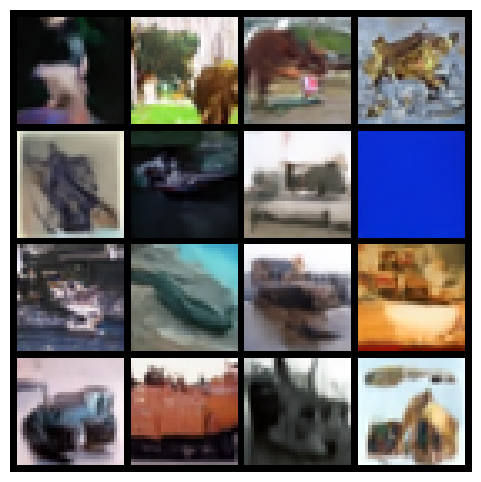

In [5]:
# Load a checkpoint and generate samples (example)
ckpt_path = './runs_ddim/checkpoint_epoch_100.pt'  # adjust to your path
if Path(ckpt_path).exists():
    ckpt = torch.load(ckpt_path, map_location=device)
    state_dict = ckpt['model_state']

    new_state_dict = {}
    for k, v in state_dict.items():
        if k.startswith('_orig_mod.'):
            new_state_dict[k.replace('_orig_mod.', '')] = v
        else:
            new_state_dict[k] = v

    model.load_state_dict(new_state_dict)
    model.to(device).eval()
    samples = sample_loop(model, schedule, (16,3,32,32), device=device)
    grid = (samples.clamp(-1,1) + 1) / 2.0
    utils.save_image(grid, 'sample_from_ckpt.png', nrow=4)
    show_image('sample_from_ckpt.png')
else:
    print('No checkpoint found at', ckpt_path)


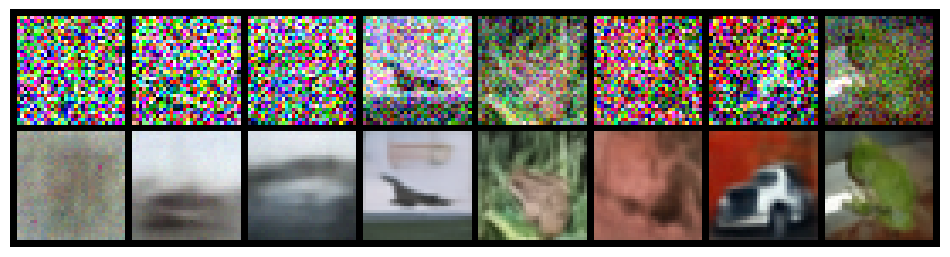

In [6]:
# Short diagnostic: take a test batch, add noise at random t, and visualize noisy vs. denoised (single-step prediction)
loader = test_loader
x, _ = next(iter(loader))
x = x[:8].to(device)
t = torch.randint(0, schedule.timesteps, (x.shape[0],), device=device)
noise = torch.randn_like(x)
x_noisy = schedule.q_sample(x, t, noise=noise)
with torch.no_grad():
    pred_noise = model(x_noisy, t)
    x0_pred = (x_noisy - schedule.sqrt_one_minus_alphas_cumprod[t].view(-1,1,1,1) * pred_noise) / schedule.sqrt_alphas_cumprod[t].view(-1,1,1,1)
    x0_pred = x0_pred.clamp(-1,1)
# show noisy and denoised pairs
pairs = torch.cat([x_noisy[:8], x0_pred[:8]], dim=0)
grid = (pairs + 1)/2.0
utils.save_image(grid, 'diagnostic_pairs.png', nrow=8)
show_image('diagnostic_pairs.png', figsize=(12,4))
